# **Часть 4. Обучение нейронных сетей**

Датасет: https://www.kaggle.com/competitions/digit-recognizer/data

Для представленного датасета необходимо:

Решить задачу многоклассовой классификации с помощью многослойной нейронной сети, состоящей из полносвязных слоев.

Вычислить градиент целевой функции по обучаемым параметрам нейронной

сети, сравнить полученные значения со значениями, вычисленными с помощью библиотечных функций

Определить параметры нейронной сети, при которых точность классификации максимальна

In [159]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import to_categorical

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [160]:
file_path = '/content/drive/MyDrive/Ex4/'
df = pd.read_csv(file_path + "train.csv")

# **Обработка данных**

In [161]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [162]:
df.shape

(42000, 785)

In [163]:
df_x = df.drop("label", axis = 1)
df_y = df["label"]

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [164]:
len(x_train)

33600

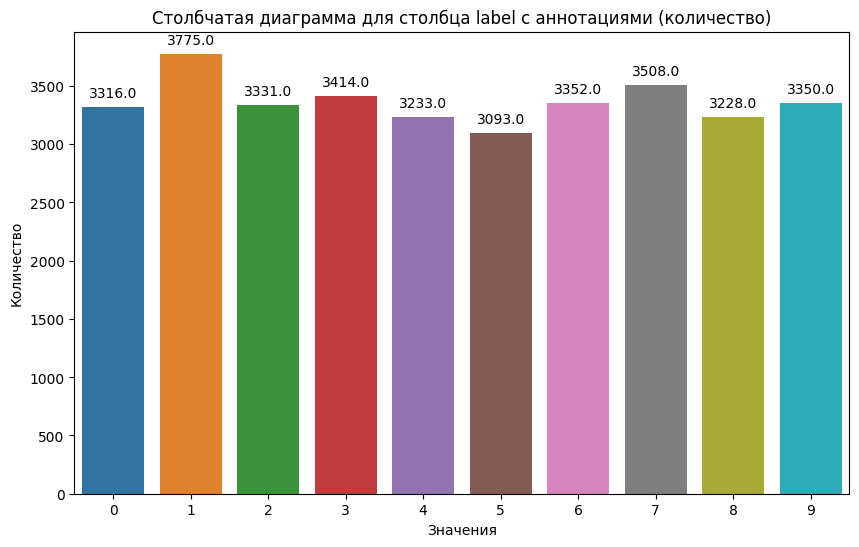

In [165]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=y_train)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title(f'Столбчатая диаграмма для столбца label с аннотациями (количество)')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.show()

In [166]:
from imblearn.over_sampling import SMOTE

x_train = x_train.reshape(x_train.shape[0], -1)

smote = SMOTE(sampling_strategy='auto', random_state=42)
x_train, y_train = smote.fit_resample(x_train, y_train)

x_train = x_train.reshape(x_train.shape[0], 28, 28)


Видим результат выравнивания обучающей выборки

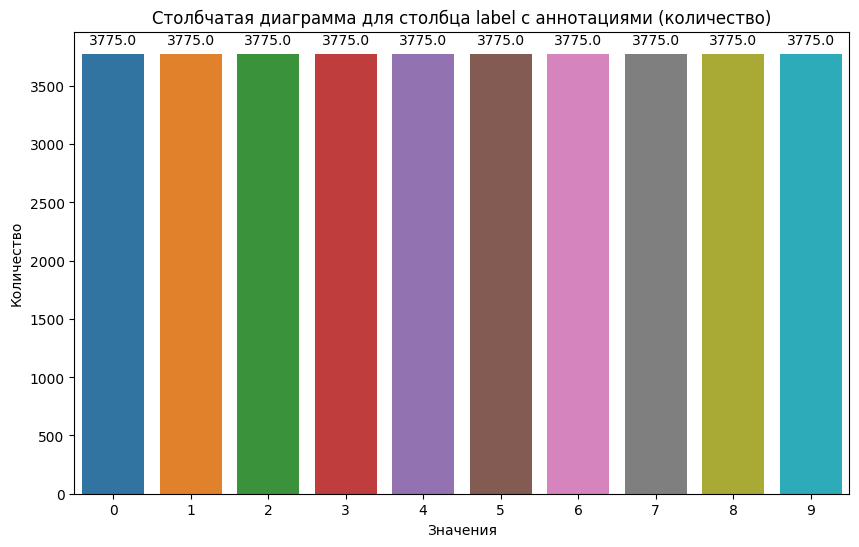

In [167]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=y_train)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title(f'Столбчатая диаграмма для столбца label с аннотациями (количество)')
plt.xlabel('Значения')
plt.ylabel('Количество')
plt.show()

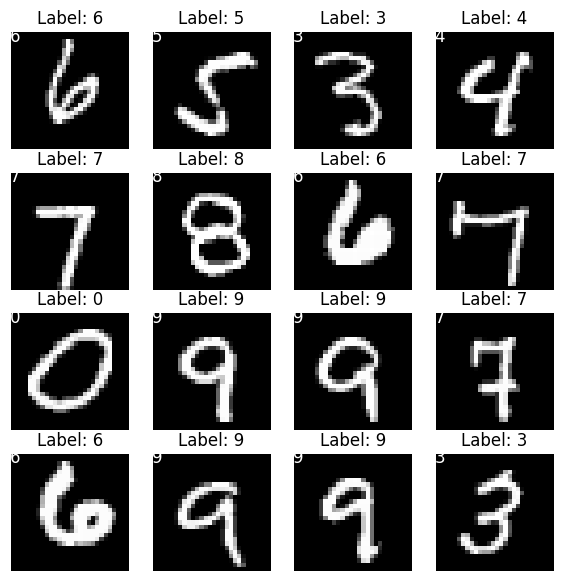

In [168]:
plt.figure(figsize=(7,7))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')  # Используйте X_train[i] и reshape для преобразования в 28x28
    plt.title(f"Label: {y_train[i]}")
    plt.text(0.5, 0.5, str(y_train[i]), color='white', fontsize=12, ha='center', va='center')
    plt.axis('off')

plt.show()

# **Многослойная полносвязная нейронная сеть**

In [169]:
np.random.seed(1671)

NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
OPTIMIZER = RMSprop()
N_HIDDEN = 128
VALIDATION_SPLIT=0.2
DROPOUT = 0.3
RESHAPED = 28*28

In [170]:
X_train = x_train.reshape(len(y_train), RESHAPED)
X_test = x_test.reshape(len(y_test), RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

Y_train = to_categorical(y_train, NB_CLASSES)
Y_test = to_categorical(y_test, NB_CLASSES)

37750 train samples
8400 test samples


In [171]:
def create_model(optimizer='adam', dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(N_HIDDEN))
    model.add(Activation('relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(NB_CLASSES))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
    return model

model = create_model(OPTIMIZER, DROPOUT)

model.compile(loss='categorical_crossentropy',
              optimizer=OPTIMIZER,
              metrics=['accuracy'])

history = model.fit(X_train, Y_train,
                    batch_size=BATCH_SIZE, epochs=NB_EPOCH,
                    verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

score = model.evaluate(X_test, Y_test, verbose=VERBOSE)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

Epoch 1/20
236/236 [==============================] - 2s 7ms/step - loss: 0.5667 - accuracy: 0.8250 - val_loss: 0.2102 - val_accuracy: 0.9413
Epoch 2/20
236/236 [==============================] - 2s 7ms/step - loss: 0.2732 - accuracy: 0.9180 - val_loss: 0.1248 - val_accuracy: 0.9661
Epoch 3/20
236/236 [==============================] - 1s 6ms/step - loss: 0.2092 - accuracy: 0.9382 - val_loss: 0.0961 - val_accuracy: 0.9746
Epoch 4/20
236/236 [==============================] - 2s 8ms/step - loss: 0.1725 - accuracy: 0.9472 - val_loss: 0.0830 - val_accuracy: 0.9767
Epoch 5/20
236/236 [==============================] - 3s 11ms/step - loss: 0.1485 - accuracy: 0.9543 - val_loss: 0.0812 - val_accuracy: 0.9785
Epoch 6/20
236/236 [==============================] - 2s 11ms/step - loss: 0.1316 - accuracy: 0.9598 - val_loss: 0.0674 - val_accuracy: 0.9811
Epoch 7/20
236/236 [==============================] - 1s 6ms/step - loss: 0.1220 - accuracy: 0.9634 - val_loss: 0.0623 - val_accuracy: 0.9820
Epoc

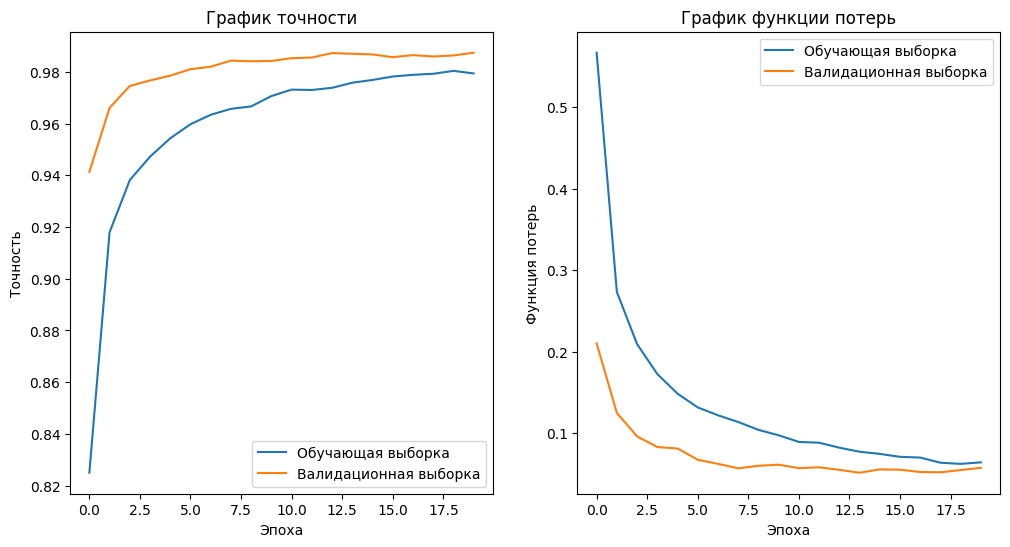

In [172]:
plt.figure(figsize=(12, 6))

# График точности на обучающей выборке
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Обучающая выборка')
plt.plot(history.history['val_accuracy'], label='Валидационная выборка')
plt.title('График точности')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.legend()

# График функции потерь на обучающей выборке
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Обучающая выборка')
plt.plot(history.history['val_loss'], label='Валидационная выборка')
plt.title('График функции потерь')
plt.xlabel('Эпоха')
plt.ylabel('Функция потерь')
plt.legend()

plt.show()

263/263 [==============================] - 1s 3ms/step


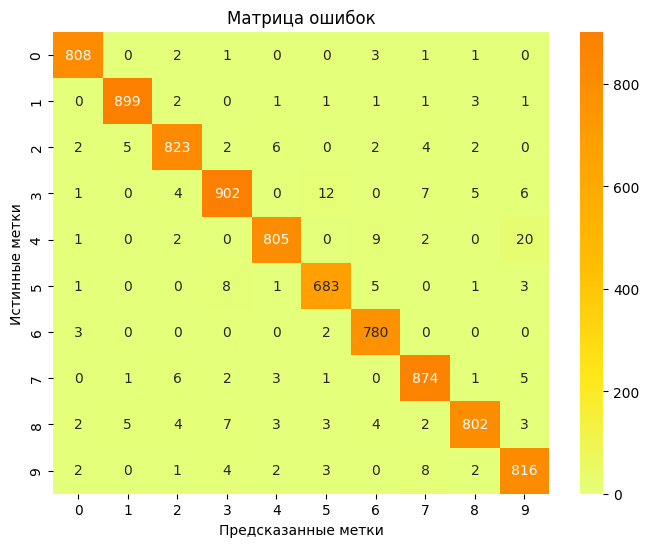

In [173]:
from sklearn.metrics import confusion_matrix
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

y_true = np.argmax(Y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Wistia', xticklabels=range(10), yticklabels=range(10))
plt.title('Матрица ошибок')
plt.xlabel('Предсказанные метки')
plt.ylabel('Истинные метки')
plt.show()

По матрице признаков видно, что нейросеть работает с высокой точностью.
Также по граифкам истории обуения видно, что сеть не переобучилась.
Точность на тестовой выборке: 0,97

# **Расчет градиента целевой функции**

## **Ручной расчет**

In [174]:
trained_weights = model.get_weights()

W1, b1, W2, b2, W3, b3 = trained_weights

X_train_sample = X_train[:BATCH_SIZE]
Y_train_sample = Y_train[:BATCH_SIZE]

Z1 = np.dot(X_train_sample, W1) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(A1, W2) + b2
A2 = np.maximum(Z2, 0)
Z3 = np.dot(A2, W3) + b3
Y_pred = np.exp(Z3) / np.exp(Z3).sum(axis=1, keepdims=True)

dZ3 = Y_pred - Y_train_sample
dW3 = np.dot(A2.T, dZ3)

dA2 = np.dot(dZ3, W3.T)
dZ2 = dA2 * (Z2 > 0)
dW2 = np.dot(A1.T, dZ2)

dA1 = np.dot(dZ2, W2.T)
dZ1 = dA1 * (Z1 > 0)
dW1 = np.dot(X_train_sample.T, dZ1)

print("Градиент для W1:\n", dW1)
print("\nГрадиент для W2:\n", dW2)
print("\nГрадиент для W3:\n", dW3)


Градиент для W1:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Градиент для W2:
 [[-2.8109630e-03 -7.8784244e-04  0.0000000e+00 ...  7.5115941e-10
   6.7996532e-03 -3.2296753e-03]
 [ 7.0374426e-07 -3.7424314e-05 -8.2622416e-04 ...  5.7185983e-04
  -1.9224808e-03 -3.8210150e-05]
 [-1.7560598e-01  1.4735092e-01  3.1240262e-02 ...  1.0248751e-03
   5.6221362e-02  1.8364805e-01]
 ...
 [-4.4275803e-04 -3.9903685e-03 -3.3585031e-03 ...  5.7222659e-04
  -2.6363798e-03 -8.4366190e-04]
 [-2.1873927e-03 -1.2026886e-06 -7.6032580e-07 ...  4.0873587e-05
   3.7110629e-03 -2.2469743e-03]
 [-7.1678301e-03 -3.0754996e-04  1.3361341e-05 ... -4.0953528e-05
  -1.2556615e-03 -1.2044761e-05]]

Градиент для W3:
 [[-3.5447691e-04  1.2004888e-03  3.0611033e-02 ... -9.4738929e-03
  -4.9598038e-04  2.6626582e-03]
 [ 1.5037785e-04 -1.8606499e-03  2.1572037e-05 ...  3.0164309e-03
   1.3894793e-04  2.211

## **Расчет при помощи библиотечой функции**

In [175]:
from tensorflow.keras import backend as K
import tensorflow as tf

with tf.GradientTape(persistent=True) as tape:
    y_pred = model(X_train_sample)
    loss = K.categorical_crossentropy(Y_train_sample, y_pred)

gradients = tape.gradient(loss, model.trainable_variables)

for var, grad in zip(model.trainable_variables, gradients):
    print(f'Градиент по {var.name} через Keras backend:\n{grad.numpy()}')


Градиент по dense_87/kernel:0 через Keras backend:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Градиент по dense_87/bias:0 через Keras backend:
[-5.64445974e-03  6.25898642e-03  1.57933736e+00 -1.70555022e-02
 -8.45067203e-04 -5.07239113e-03 -1.30834384e-02  1.65611398e+00
  1.84126866e+00 -1.50710868e-03 -1.59936044e-02  3.01864535e-01
  1.71491958e-03 -5.73869608e-03  8.03565979e-03  7.63611019e-01
  1.69666391e-03 -4.43028100e-03 -4.67903493e-03 -1.46500111e+00
  3.08053615e-03  4.62929934e-01 -1.23956846e-02 -1.88881361e+00
  3.57226282e-02 -3.95951141e-03 -3.00715817e-03  5.40385081e-04
 -1.27324117e-02  2.87356526e-01  1.08024442e+00  1.26380064e-02
 -1.16337382e-03  2.74956622e-03 -2.12562992e-03  3.79235600e-03
 -1.84528108e-04 -6.22055901e-04 -2.16098363e-03 -3.56653929e-01
 -1.66561659e-02 -1.22227621e+00 -9.32443328e-03 -1.07412040e-02
 -4.73166001e-04 -1.85878205e